In [1]:
import numpy as np
import scipy as sp
import nltk
from nltk.stem import WordNetLemmatizer
import re
import unicodedata
import os
import tqdm
# from functions import *
import fasttext.util

fasttext.util.download_model('en', if_exists='ignore')
try:
    ft
except:
    ft = fasttext.load_model('cc.en.300.bin')
    # fasttext.util.reduce_model(ft, 100)
import pandas as pd
import json
import traceback

In [25]:
# ft = fasttext.load_model('cc.en.300.bin')
from functions import *

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
# import spacy
from sklearn.model_selection import train_test_split

# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,  Dropout, Flatten, Dense, Activation, BatchNormalization

In [27]:
# glove_model, vector_length = loadvector('glove_files\\glove.twitter.27B.100d.txt')

In [28]:
def get_output(sentence):
    # returns the output of CNN model
    pass

In [30]:
# class handle_glove:
#     def __init__(self, file = 'glove_files\\glove.6B.50d.txt'):
#         try:
#             self.glove, self.vector_length = glove_model, vector_length
#         except:
#             print(f'Loading {file}')
#             self.glove, self.vector_length, self.words = loadvector(file)
            
#     def get_vector(self, word):
#         if word in self.glove:
#             return self.glove[word]
#         else:
#             return np.zeros(self.vector_length)

#     def difference_vector(self, word1, word2):
#         if word1 > word2:
#             word1, word2 = word2, word1
#         return self.get_vector(word1) - self.get_vector(word2)

#     def word_vector_dataframe(self, words, vector_cols = None): # words is (n, 2) matrix)
#         if vector_cols == None:
#             columns_features = [f'x{num}' for num in range(self.vector_length)]
#             columns = ['word_1', 'word_2', 'type'] + columns_features # type --> 0 for synonyms and 1 for antonyms
#             out_vectors = np.array([self.difference_vector(*wpair[0:2]) for wpair in words])
#         else:
#             columns_features = [f'x{num}' for num in vector_cols]
#             columns = ['word_1', 'word_2', 'type'] + columns_features # type --> 0 for synonyms and 1 for antonyms
#             out_vectors = np.array([self.difference_vector(*wpair[0:2])[vector_cols] for wpair in words])
#         final_vectors = [
#             np.concatenate((words[num], out_vectors[num]))
#                 for num in range(len(words))
#         ]
#         df = pd.DataFrame(
#             final_vectors,
#             columns = columns
#         )
#         return df
#     def to_csv(self, filepath = None):
#         columns = ['word'] + [f'x{num}' for num in range(self.vector_length)]
#         df = pd.DataFrame(
#             [np.concatenate((np.array([key]), self.glove[key])) for key in self.glove],
#             columns = columns
#         )
#         if filepath:
#             df.to_csv(filepath)
#         return df


In [31]:
class handle_fasttext:
    def __init__(self, file = 'glove_files\\glove.6B.50d.txt'):
        # self.ft = fasttext.load_model('cc.en.300.bin')
        try:
            self.ft = ft
        except:
            self.ft = fasttext.load_model('cc.en.300.bin')
        self.vector_length = self.ft.get_dimension()
        # try:
        #     self.glove, self.vector_length = glove_model, vector_length
        #     
        # except:
        #     print(f'Loading {file}')
        #     self.glove, self.vector_length, self.words = loadvector(file)
        pass
    
    def get_vector(self, word):
        return self.ft.get_word_vector(word)

    def difference_vector(self, word1, word2):
        if word1 > word2:
            word1, word2 = word2, word1
        return self.get_vector(word1) - self.get_vector(word2)

    def word_vector_dataframe(self, words, vector_cols = None): # words is (n, 2) matrix)
        if vector_cols == None:
            columns_features = [f'x{num}' for num in range(self.vector_length)]
            columns = ['word_1', 'word_2', 'type'] + columns_features # type --> 0 for synonyms and 1 for antonyms
            out_vectors = np.array([self.difference_vector(*wpair[0:2]) for wpair in words])
        else:
            columns_features = [f'x{num}' for num in vector_cols]
            columns = ['word_1', 'word_2', 'type'] + columns_features # type --> 0 for synonyms and 1 for antonyms
            out_vectors = np.array([self.difference_vector(*wpair[0:2])[vector_cols] for wpair in words])
            
        final_vectors = [
            np.concatenate((words[num], out_vectors[num]))
                for num in range(len(words))
        ]
        df = pd.DataFrame(
            final_vectors,
            columns = columns
        )
        return df
    def to_csv(self, filepath = None):
        columns = ['word'] + [f'x{num}' for num in range(self.vector_length)]
        df = pd.DataFrame(
            [np.concatenate((np.array([key]), self.glove[key])) for key in self.glove],
            columns = columns
        )
        if filepath:
            df.to_csv(filepath)
        return df


In [32]:
# class handle_spacy_vectors:
#     def __init__(self, nlp = spacy.load("en_core_web_sm")):
#         self.nlp = nlp
#         self.vector_length = len(nlp("word")[0].vector)
#         self.vectors = {}
    
#     def get_vector(self, word):
#         if word not in self.vectors:
#             self.vectors[word] = self.nlp(word)[0].vector
#         return self.vectors[word]

#     def difference_vector(self, word1, word2):
#         if word1 > word2:
#             word1, word2 = word2, word1
#         return self.get_vector(word1) - self.get_vector(word2)

#     def word_vector_dataframe(self, words, vector_cols = None): # words is (n, 2) matrix)
#         if vector_cols == None:
#             columns_features = [f'x{num}' for num in range(self.vector_length)]
#             columns = ['word_1', 'word_2', 'type'] + columns_features # type --> 0 for synonyms and 1 for antonyms
#             out_vectors = np.array([self.difference_vector(*wpair[0:2]) for wpair in words])
#         else:
#             columns_features = [f'x{num}' for num in vector_cols]
#             columns = ['word_1', 'word_2', 'type'] + columns_features # type --> 0 for synonyms and 1 for antonyms
#             out_vectors = np.array([self.difference_vector(*wpair[0:2])[vector_cols] for wpair in words])
            
#         final_vectors = [
#             np.concatenate((words[num], out_vectors[num]))
#                 for num in range(len(words))
#         ]
#         df = pd.DataFrame(
#             final_vectors,
#             columns = columns
#         )
#         return df
#     def to_csv(self, filepath = None):
#         columns = ['word'] + [f'x{num}' for num in range(self.vector_length)]
#         df = pd.DataFrame(
#             [np.concatenate((np.array([key]), self.glove[key])) for key in self.glove],
#             columns = columns
#         )
#         if filepath:
#             df.to_csv(filepath)
#         return df
    

In [33]:
# for file in os.listdir("glove_files"):
# # for file in ['glove.6B.50d.txt']:
#     fname = os.path.join("glove_files", file)
#     myglove = handle_glove(fname)
#     savename = os.path.splitext(os.path.split(file)[-1])
#     savename = savename[0]
#     savename = f"{savename}.json"
#     savename = os.path.join("glove_index", savename)
#     print(savename)
#     words = myglove.words
#     words = {words[num]: num for num in range(len(words))}
#     vector_length = myglove.vector_length
#     words['vector_length'] = vector_length
#     json.dump(words, open(savename, 'w'), indent = 4)

In [34]:
class model_trainer:
    def __init__(self, glove_model = None) -> None:
        pass
    def get_models(self):

        all_models = {
            # "LinearRegression": LinearRegression(fit_intercept=True, normalize=True, n_jobs=1, copy_X=True),
            "LogisticRegression": LogisticRegression(),
            "DecisionTreeClassifier": DecisionTreeClassifier(),
            "RandomForestClassifier": RandomForestClassifier(),
            "SVC_Linear": SVC(kernel = "linear"),
            "SVC_Poly": SVC(kernel = "poly"),
            "SVC": SVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "LinearSVC": LinearSVC(),
            # "DL_model1": model_dl_1
        }
        return all_models
    
    def train_model(self, model, train_x, train_y):
        print("Training", model)
        model.fit(train_x, train_y)
        return model
    
    def train_models(self, models, x_train, y_train):
        trained_models = {}
        for model in models:
            print(f"Training Model: {model}")
            trained_models[model] = self.train_model(models[model], x_train, y_train)
        return trained_models
    
    def validate_model(self, model, test_x, test_y, critical): # returns accuracy
        predictions = model.predict(test_x)
        predictions = predictions.reshape(predictions.size)
        # print(predictions)
        predictions[(predictions >= critical)] = 1
        predictions[(predictions < critical)] = 0
        test_y[(test_y >= critical)] = 1
        test_y[(test_y < critical)] = 0
        validations = predictions == test_y
        validations = list(validations)
        # print(validations)
        total, positive = len(validations), validations.count(True)
        return positive / total, (test_y, predictions)
    
    def validate_models(self, models, test_x, test_y, critical = 0.5):
        validations = {}
        for model in models:
            # print(f"Validating Model: {model}")
            accuracy = self.validate_model(models[model], test_x, test_y, critical)
            validations[model] = accuracy
        return validations
    
    def split_data(self, df, x = None, y = ["type"], shuffle = True, test_size = 0.3):
        if x == None:
            x = df.columns[3:]
        df_input = df[x]
        df_output = df[y]
        x_train, x_test, y_train, y_test = train_test_split(
            df_input,
            df_output,
            shuffle = shuffle,
            test_size = test_size
        )
        to_int = np.vectorize(int)
        y_train = to_int(y_train.values.reshape(y_train.size))
        y_test = to_int(y_test.values.reshape(y_test.size))
        return x_train, x_test, y_train, y_test

    def apply_models(self, df, x = None, y = ["type"], shuffle = True, test_size = 0.3, critical = 0.5):
        x_train, x_test, y_train, y_test = self.split_data(df, x, y, shuffle, test_size)
        # print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
        # print(x_train.columns)
        # print(y_train.columns)
        # print(x_train)
        # return None, None
        # print("Getting Models")
        models = self.get_models()
        # print("Training")
        trained_models = self.train_models(models, x_train, y_train)
        # print("Validating")
        validations = self.validate_models(trained_models, x_test, y_test, critical)
        return trained_models, validations



    


In [35]:
synonym_pairs = [line.strip().split() + [0] for line in open("synonym_pairs.txt")]
antonym_pairs = [line.strip().split() + [1] for line in open("antonym_pairs.txt")]

In [36]:
# print(os.listdir('glove_files'))

In [37]:
dataframes = {}

In [38]:
# # for file in os.listdir('glove_files'):
# for file in ['glove.840B.300d.txt']:
#     try:
#         file = os.path.join('glove_files', file)
#         glove = handle_glove(file)
#         df = glove.word_vector_dataframe(synonym_pairs + antonym_pairs)
#         dataframes[file] = df 
#     except:
#         print(f"Failed to run model: {file}")
#         print(traceback.print_exc())

In [39]:

# try:
#     glove = handle_fasttext()
#     df = glove.word_vector_dataframe(synonym_pairs + antonym_pairs)
#     # print(df)
#     # dataframes[file] = df 
# except:
#     # print(f"Failed to run model: {file}")
#     print(traceback.print_exc())

In [40]:
# all_results = {}
# try:
#     # file = os.path.join('glove_files', file)
#     file = 'fasttest'
#     glove = handle_spacy_vectors()
#     df = glove.word_vector_dataframe(synonym_pairs + antonym_pairs)
#     dataframes[file] = df 
#     mt = model_trainer()
#     x_train, x_test, y_train, y_test = mt.split_data(df)
#     # all_results[file] = results
# except:
#     print(f"Failed to get df's: {file}")
#     print(traceback.print_exc())
# # json.dump(all_results, open("all_results_oxymorons.json", "w"), indent = 4)
# # all_results

In [41]:
# import matplotlib.pyplot as plt

# plt.matshow(df.corr())
# plt.show()

In [42]:
# tofloat = np.vectorize(float)
# x_train = tofloat(x_train.values)
# x_test = tofloat(x_test.values)

In [43]:
# num_attr = x_train.shape[1] // 4
# mul = 4
# print(num_attr)

# model_nn = Sequential()
# model_nn.add(Dense(num_attr * 4 * 2, input_shape = (x_train.shape[1],), activation = 'relu'))
# model_nn.add(Dense(num_attr * mul, activation = 'relu'))
# model_nn.add(Dense(num_attr * 13, activation = 'relu'))
# model_nn.add(Dense(num_attr * 8, activation = 'relu'))
# model_nn.add(Dropout(0.3))
# model_nn.add(Dense(num_attr * 4, activation = 'relu'))
# model_nn.add(Dense(num_attr * 2, activation = 'relu'))
# model_nn.add(Dense(num_attr * 1, activation = 'relu'))
# model_nn.add(Dropout(0.3))
# model_nn.add(Dense(1, activation = 'sigmoid'))
# model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )
# model_nn.summary()


In [44]:
# for num in range(10):
#     print("Epoch:", num + 1)
#     model_nn.fit(x_train, y_train)
#     model_nn.evaluate(x_test, y_test)

In [45]:
all_results = {}
try:
    # file = os.path.join('glove_files', file)
    file = 'fasttest_dl'
    glove = handle_fasttext()
    print("Making DF")
    df = glove.word_vector_dataframe(synonym_pairs + antonym_pairs)
    print("TRAINING")
    dataframes[file] = df 
    mt = model_trainer()
    models, results = mt.apply_models(df)
    all_results[file] = results
except:
    print(f"Failed to run model: {file}")
    print(traceback.print_exc())
# json.dump(all_results, open("all_results_oxymorons.json", "w"), indent = 4)
# all_results

Making DF
TRAINING
Training Model: LogisticRegression
Training LogisticRegression()
Training Model: DecisionTreeClassifier
Training DecisionTreeClassifier()
Training Model: RandomForestClassifier
Training RandomForestClassifier()
Training Model: SVC_Linear
Training SVC(kernel='linear')
Training Model: SVC_Poly
Training SVC(kernel='poly')
Training Model: SVC
Training SVC()
Training Model: KNeighborsClassifier
Training KNeighborsClassifier()
Training Model: LinearSVC
Training LinearSVC()


c:\Users\cvesw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [47]:
def plot_confusion_matrix(model, actual, predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.title(model)
    plt.show()



In [48]:
for model in all_results[file]:
    pass


LogisticRegression 0.5529201163571269


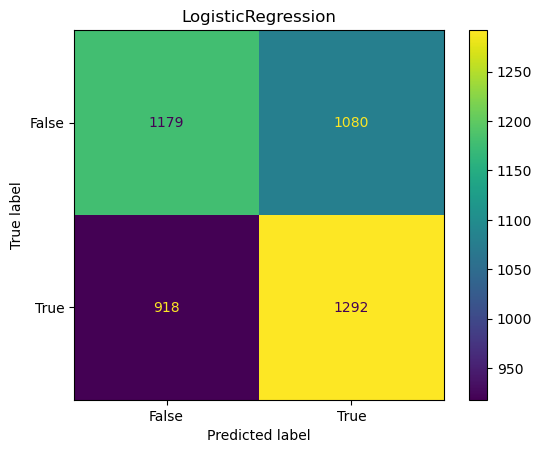

DecisionTreeClassifier 0.6589841127769076


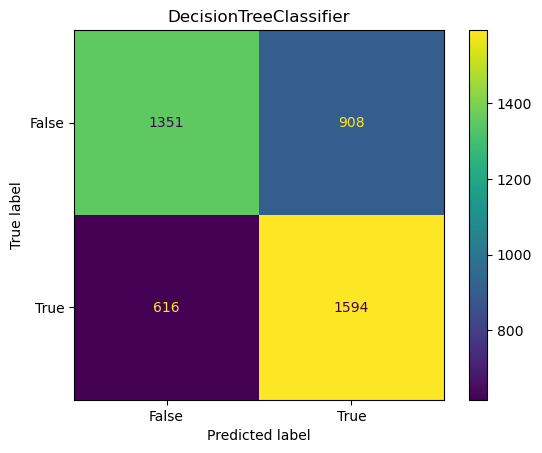

RandomForestClassifier 0.7552025061535019


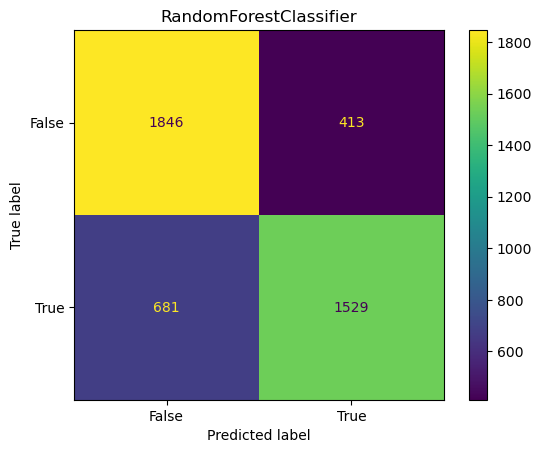

SVC_Linear 0.5565003356455583


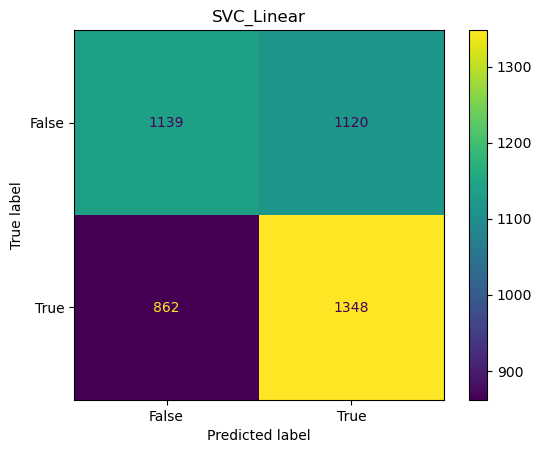

SVC_Poly 0.5813381069590512


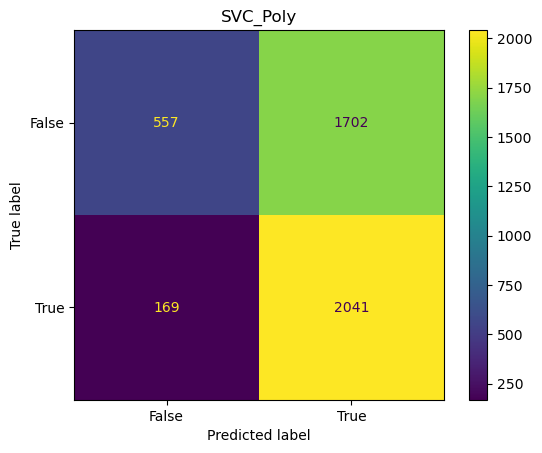

SVC 0.7621391810248378


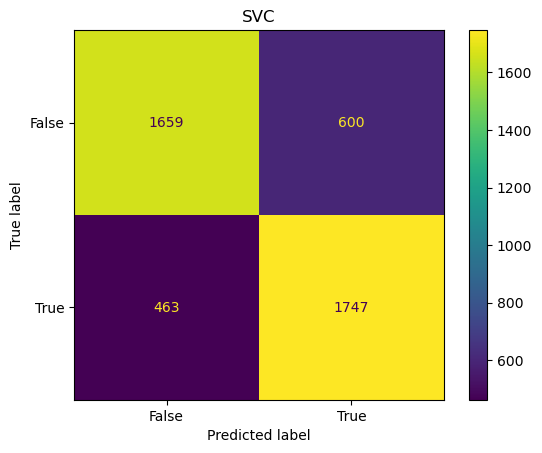

KNeighborsClassifier 0.6912060863727904


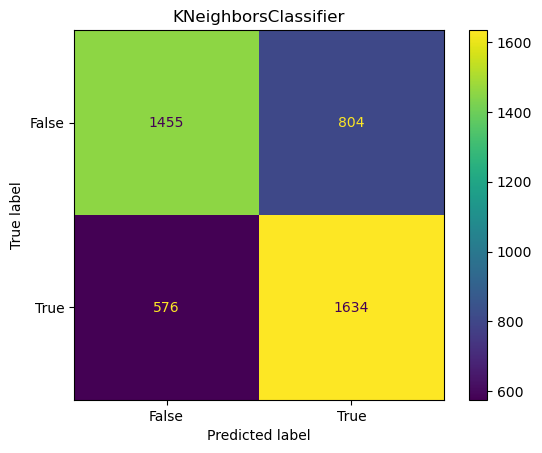

LinearSVC 0.5511300067129111


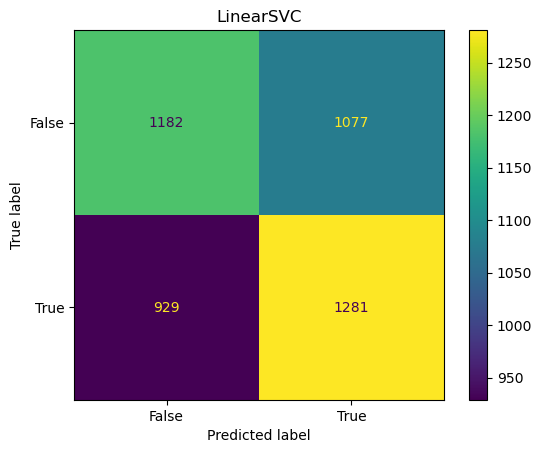

In [49]:
for model in all_results[file]:
    actual, predicted = all_results[file][model][1]
    print(model, all_results[file][model][0])
    plot_confusion_matrix(model, actual, predicted)

In [52]:
all_results['fasttest_dl'].keys()

dict_keys(['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC_Linear', 'SVC_Poly', 'SVC', 'KNeighborsClassifier', 'LinearSVC'])

In [73]:
def predict_final(predictions):
    ['RandomForestClassifier', 'SVC', 'KNeighborsClassifier']
    true_count = 0
    for prediction in predictions:
        if prediction:
            true_count += 1
    if (true_count/len(predictions)) > 0.5:
        return True
    else:
        return False

LogisticRegression 0.5529201163571269


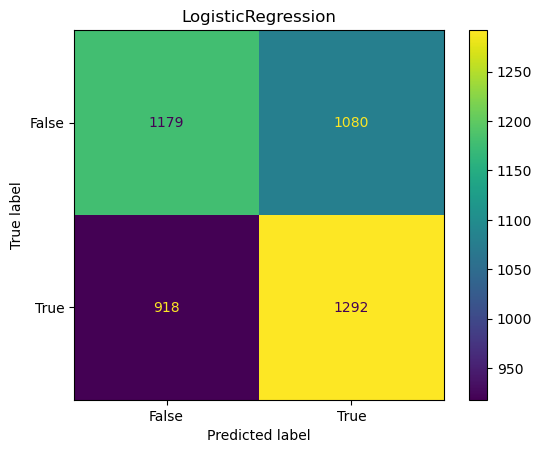

DecisionTreeClassifier 0.6589841127769076


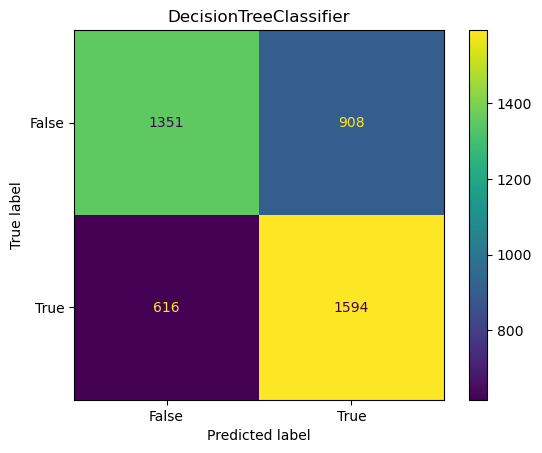

RandomForestClassifier 0.7552025061535019


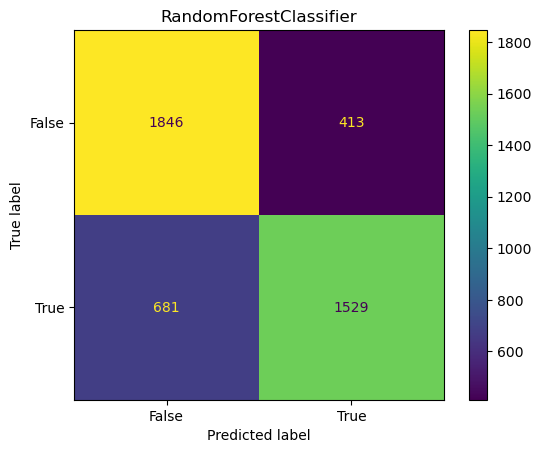

SVC_Linear 0.5565003356455583


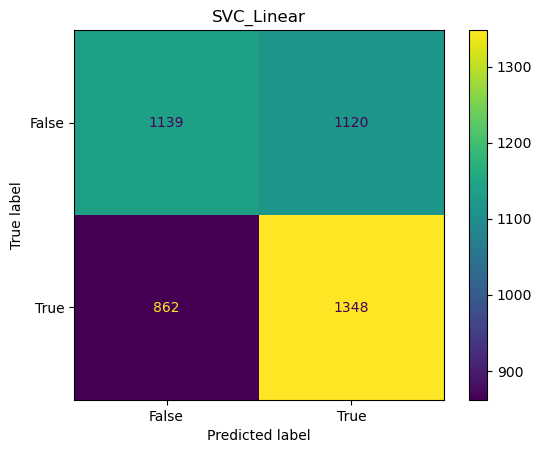

SVC_Poly 0.5813381069590512


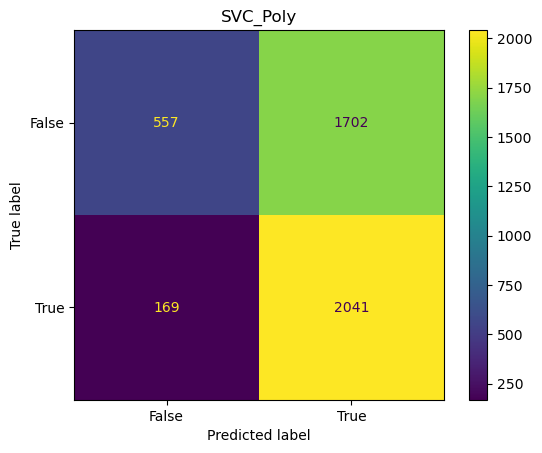

SVC 0.7621391810248378


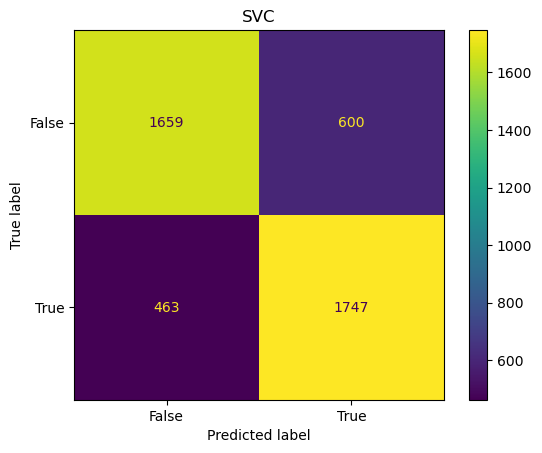

KNeighborsClassifier 0.6912060863727904


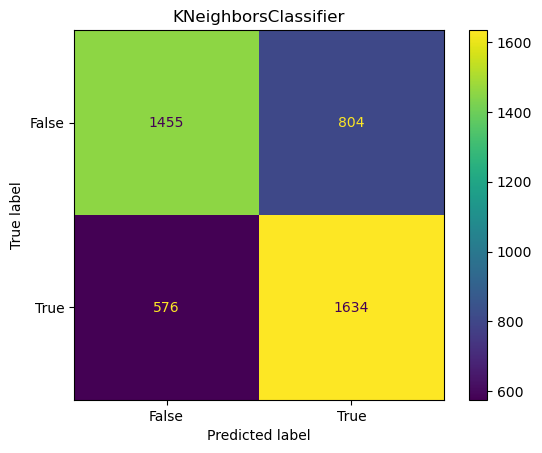

LinearSVC 0.5511300067129111


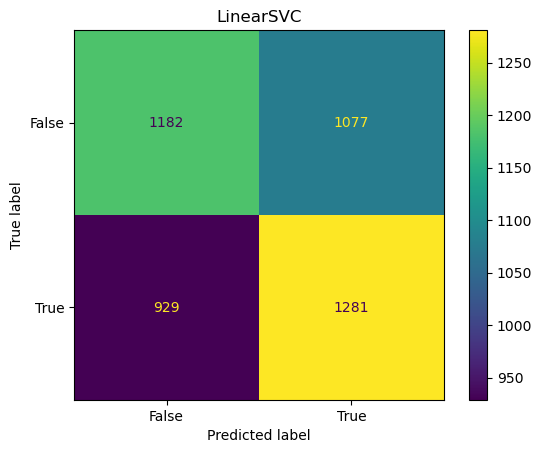

In [81]:
results_predicted = []
for model in all_results[file]:
    actual, predicted = all_results[file][model][1]
    if model in ['RandomForestClassifier', 'SVC', 'KNeighborsClassifier']:
        results_predicted.append(predicted)
    print(model, all_results[file][model][0])
    plot_confusion_matrix(model, actual, predicted)

In [82]:
final = []
for num in range(len(results_predicted[0])):
    final.append([arr[num] for arr in results_predicted])

In [83]:
final_res = np.array([predict_final(row) for row in final])

In [84]:
results = actual == final_res

In [85]:
reslts = list(results)
print(reslts.count(True)/len(results))

0.7825016782277915


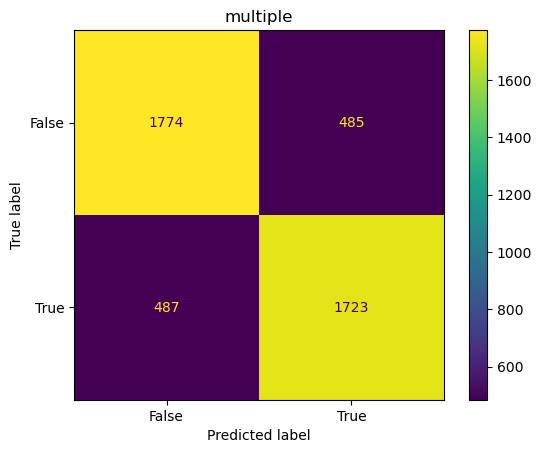

In [86]:
plot_confusion_matrix("multiple", actual, final_res)

In [87]:
for model in models:
    models[model].save(f"{model}.pickle")

AttributeError: 'LogisticRegression' object has no attribute 'save'

In [ ]:
import copy
import pickle
for model in models:
    pickle.dump(models[model], open(f"save_models/{model}.pickle", "wb"))

In [ ]:
all_results

{'fasttest_dl': {'LogisticRegression': 0.539718057731036,
  'DecisionTreeClassifier': 0.6576415305437459,
  'RandomForestClassifier': 0.7424479749384649,
  'SVC_Linear': 0.5323338554486462,
  'SVC_Poly': 0.5744014320877153,
  'SVC': 0.7599015439695681,
  'KNeighborsClassifier': 0.6800179010964421,
  'LinearSVC': 0.5390467666144552}}

In [ ]:
list(models.keys())

['LogisticRegression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'SVC_Linear',
 'SVC_Poly',
 'SVC',
 'KNeighborsClassifier',
 'LinearSVC']

In [ ]:
def predict_oxymorons(list_of_word_pairs):
    vectors = [
        [
        glove.get_vector(word) for word in wp
        ]
            for wp in list_of_word_pairs
    ]
    loaded_models = {}
    for model in models:
        loaded_models[model] = pickle.load(open(f"save_models/{model}.pickle", "rb"))
    return loaded_models
    pass

In [ ]:
# import pickle
# for model in models:
#     pickle.load(open(f"save_models/{model}.pickle", "rb"))

In [ ]:
all

In [ ]:
# for file in dataframes:
#     savename = os.path.split(file)[-1]
#     savename = os.path.splitext(savename)
#     savename = savename[0].replace(".", "_")
#     savename = f"{savename}.csv"
#     savename = os.path.join("dataframes", savename)
#     print(savename)
#     dataframes[file].to_csv(savename)

In [ ]:
# best_results = {}
# final_results = {}
# count = 0
# total = 0
# for result in all_results:
#     for model in all_results[result]:
#         val = all_results[result][model]
#         if val > 0.74:
#             count += 1
#             total += val
#             # final_results.append([result, model])
#             if result in final_results:
#                 final_results[result][model] = val
#             else:
#                 final_results[result] = {model: val}
# print(total / count)
# # for result in final_results:
# #     print(result)
# final_results